In [25]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_agents = 100
total_rounds = 1000
compromise_rate = 0.10
penalty = 0.05
reward = 0.02
use_countermeasures = True  # <<< Toggle this to False to see "no defenses"!

# Initialize robots
robots = {}
for i in range(1, num_agents + 1):
    robot_id = f"Robot_{i}"
    initial_trust = round(random.uniform(0.3, 0.95), 2)
    robots[robot_id] = {
        'trust': initial_trust,
        'compromised': True,
        'trust_history': [initial_trust],
        'success_count': 0,
        'fail_count': 0
    }

print(f"✅ Initialized {num_agents} robots with random trust scores.")

✅ Initialized 100 robots with random trust scores.


In [26]:
# --- Logs for analysis ---
compromised_counts = []
success_counts = []
fail_counts = []



In [27]:
# --- Main Simulation Loop ---
for round_num in range(total_rounds):

    # Randomly choose ~10% of robots to compromise
    num_compromised = int(num_agents * compromise_rate)
    compromised_ids = random.sample(list(robots.keys()), num_compromised)

    # Counters for this round
    round_compromised = 0
    round_success = 0
    round_fail = 0

    for robot_id in robots:
        robot = robots[robot_id]
        robot['compromised'] = robot_id in compromised_ids

        if robot['compromised']:
            round_compromised += 1
            robot['fail_count'] += 1
            robot['trust'] = max(0.0, robot['trust'] - penalty)
        else:
            if random.random() < robot['trust']:
                round_success += 1
                robot['success_count'] += 1
                robot['trust'] = min(1.0, robot['trust'] + reward)
            else:
                round_fail += 1
                robot['fail_count'] += 1
                robot['trust'] = max(0.0, robot['trust'] - penalty)

        # Apply Countermeasures (optional)
        if use_countermeasures:
            # Recovery over time
            if robot['success_count'] > 5 and robot['trust'] < 0.9:
                robot['trust'] += 0.01

            # Trust floor every 200 rounds
            if round_num % 200 == 0:
                robot['trust'] = max(robot['trust'], 0.2)

            # Optionally: Skip low-trust assignments (commented out here)
            # if robot['trust'] < 0.2:
            #     continue

        # Log this round's trust
        robot['trust_history'].append(robot['trust'])

    # Record round stats
    compromised_counts.append(round_compromised)
    success_counts.append(round_success)
    fail_counts.append(round_fail)

print(f"✅ Finished {total_rounds} simulation rounds!")



✅ Finished 1000 simulation rounds!


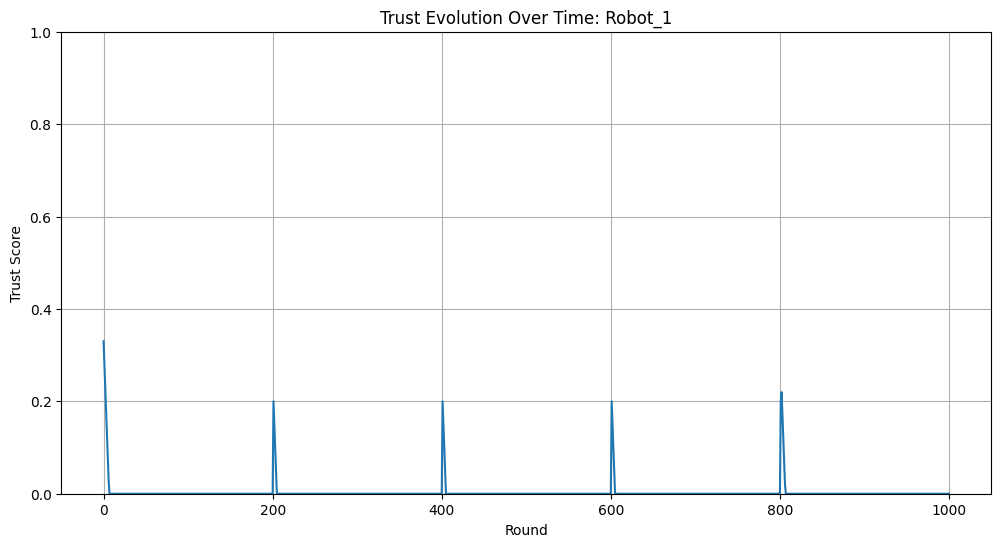

In [28]:
example_robot_id = "Robot_1"
plt.figure(figsize=(12,6))
plt.plot(robots[example_robot_id]['trust_history'])
plt.title(f"Trust Evolution Over Time: {example_robot_id}")
plt.xlabel("Round")
plt.ylabel("Trust Score")
plt.ylim(0, 1)
plt.grid()
plt.show()

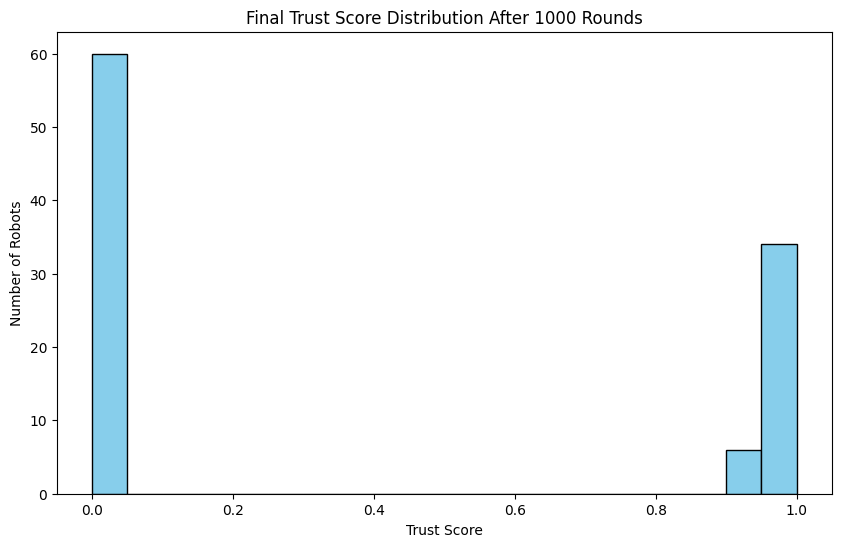

In [29]:
final_trust_scores = [robots[robot_id]['trust'] for robot_id in robots]
plt.figure(figsize=(10,6))
plt.hist(final_trust_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Final Trust Score Distribution After 1000 Rounds")
plt.xlabel("Trust Score")
plt.ylabel("Number of Robots")
plt.show()

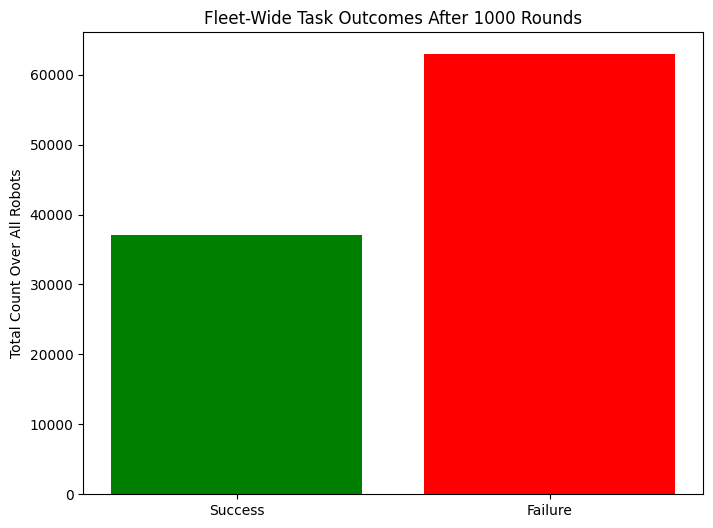

✅ Total Successes: 37077
✅ Total Failures: 62923


In [30]:
total_success = sum(robots[robot_id]['success_count'] for robot_id in robots)
total_fail = sum(robots[robot_id]['fail_count'] for robot_id in robots)

plt.figure(figsize=(8,6))
plt.bar(['Success', 'Failure'], [total_success, total_fail], color=['green', 'red'])
plt.title("Fleet-Wide Task Outcomes After 1000 Rounds")
plt.ylabel("Total Count Over All Robots")
plt.show()

print(f"✅ Total Successes: {total_success}")
print(f"✅ Total Failures: {total_fail}")


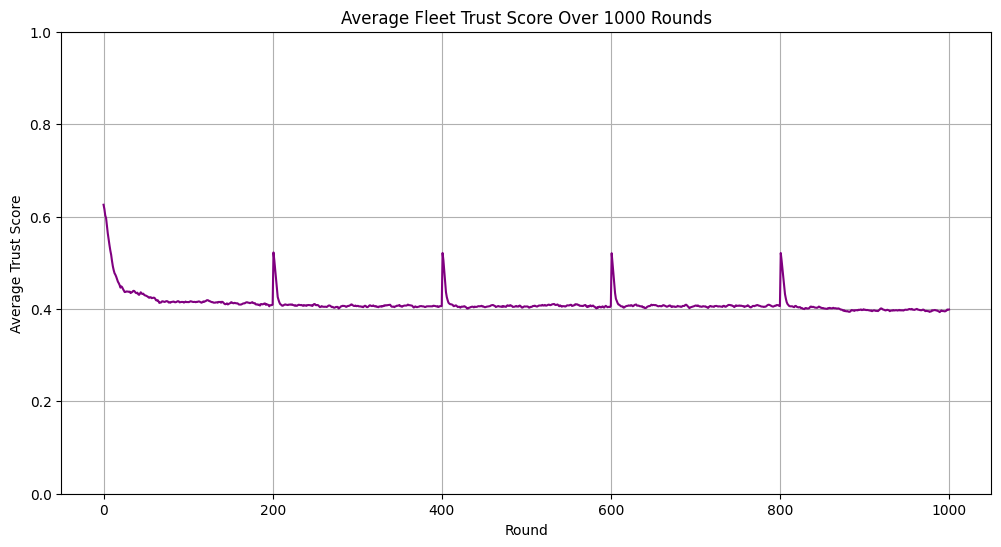

In [31]:
rounds = len(next(iter(robots.values()))['trust_history'])
average_trust_per_round = []
for round_idx in range(rounds):
    avg = np.mean([robots[robot_id]['trust_history'][round_idx] for robot_id in robots])
    average_trust_per_round.append(avg)

plt.figure(figsize=(12,6))
plt.plot(range(rounds), average_trust_per_round, color='purple')
plt.title("Average Fleet Trust Score Over 1000 Rounds")
plt.xlabel("Round")
plt.ylabel("Average Trust Score")
plt.ylim(0, 1)
plt.grid()
plt.show()

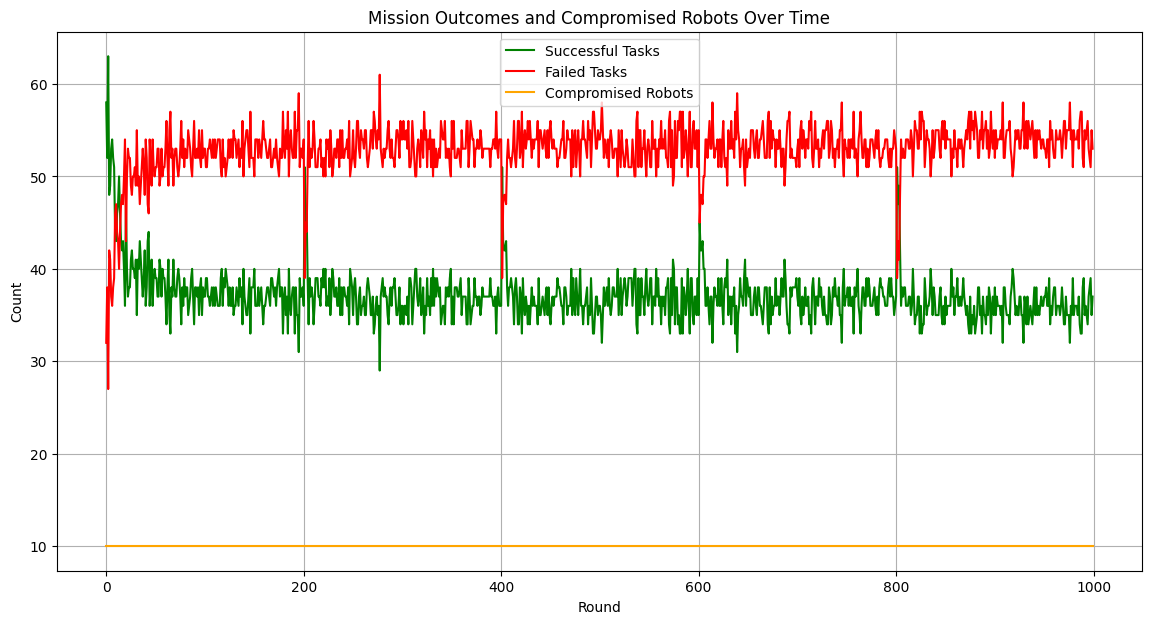

In [32]:
plt.figure(figsize=(14,7))
plt.plot(range(total_rounds), success_counts, label='Successful Tasks', color='green')
plt.plot(range(total_rounds), fail_counts, label='Failed Tasks', color='red')
plt.plot(range(total_rounds), compromised_counts, label='Compromised Robots', color='orange')
plt.title("Mission Outcomes and Compromised Robots Over Time")
plt.xlabel("Round")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()